# Load The Dataset

## IMPORTS

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [50]:
FILENAME = "train.csv"
df_res = pd.read_csv(FILENAME)
df_res.columns

Index(['Year', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9',
       'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19',
       'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29',
       'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39',
       'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49',
       'S50', 'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59',
       'S60', 'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69',
       'S70', 'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S78', 'S79',
       'S80', 'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88', 'S89'],
      dtype='object')

# Split The Dataset

In [51]:
def my_train_test():
    X = df_res.iloc[:, 1:]
    y = df_res[["Year"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return(X_train, X_test, y_train, y_test)

def my_train_validation_test():
    X = df_res.iloc[:, 1:]
    y = df_res[["Year"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    return(X_train, X_val, y_train, y_val, X_test, y_test)

In [52]:
X_train, X_test, y_train, y_test = my_train_test()

# Show Data Distribution

In [53]:
def histogram(column_name):
    data = X_train[column_name]
    plt.hist(data)
    plt.show()

def all_histograms(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Istogramma della colonna {col}')
        plt.xlabel('Valore')
        plt.ylabel('Frequenza')
        plt.grid(True)
        plt.show()

def boxplot_y():
    data = y_train["Year"]
    plt.boxplot(data, whis=1.5)
    plt.show()

def density_plots(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.displot(df[col], kind="kde", fill=True)
        plt.title(f'Densità di probabilità della colonna {col}')
        plt.xlabel('Valore')
        plt.ylabel('Densità')
        plt.grid(True)
        plt.show()

# Pre-processing

In [54]:
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [55]:
#Normalization
def plot_norm(x, x_normalized):
    plt.subplot(2, 1, 1)
    plt.plot(x)
    plt.subplot(2, 1, 2)
    plt.plot(x_normalized)
    plt.show()

def standardization(X_val = None):
    #Standardization
    scaler = preprocessing.StandardScaler()
    #Addestramento
    scaler.fit(X_train)
    #Applicazione
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    if X_val is not None:
        X_val_scaled = scaler.transform(X_val)
        return (X_train_scaled, X_test_scaled, X_val_scaled)
    else:
        return (X_train_scaled, X_test_scaled)


In [56]:
X_train_scaled, X_test_scaled = standardization()

PCA

In [57]:

def f_pca(num_components = None, X_val_scaled = None):
    if num_components is not None:
        pca = PCA(n_components=num_components)
    else: pca = PCA()
    principals_components_train = pca.fit_transform(X_train_scaled)

    # Trasforma il set di test utilizzando la stessa PCA addestrata sul set di addestramento
    principals_components_test = pca.transform(X_test_scaled)

    #loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)], index=X_train.columns)
    #print(loadings)
    if X_val_scaled is not None:
        principals_components_val = pca.transform(X_val_scaled)
        return (principals_components_train, principals_components_test, principals_components_val, pca)
    else:
        return (principals_components_train, principals_components_test, pca)

In [58]:
principals_components_train, principals_components_test, pca = f_pca(54)

In [59]:
principals_components_train

array([[ -2.75275143,  -1.14191208,   0.55336784, ...,  -0.23659988,
          0.41470862,  -0.05941764],
       [  0.62241713,   1.44904954,   0.53006008, ...,  -0.30552375,
          0.3309779 ,  -0.05390539],
       [ -0.56413526,  -1.47534738,   0.31945856, ...,   0.08171336,
          0.19574793,  -0.29056609],
       ...,
       [ -0.40175257,  -0.22096537,   0.68208838, ...,   0.0557874 ,
         -0.28984752,   0.20206861],
       [  8.66252312,  -2.41434049, -10.29443525, ...,  -1.33642967,
          1.88161151,   1.10334407],
       [ -0.78148852,  -1.58696082,   1.46764482, ...,  -0.18913567,
          0.01836721,   0.01929803]])

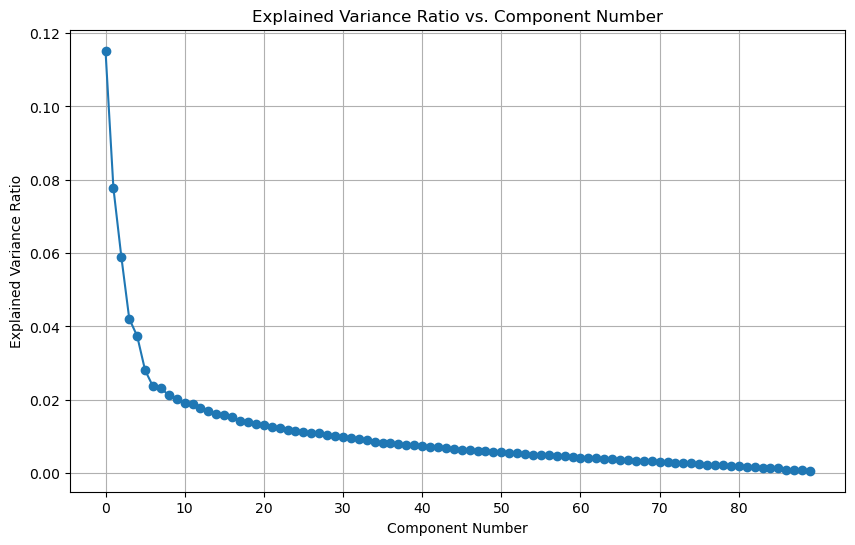

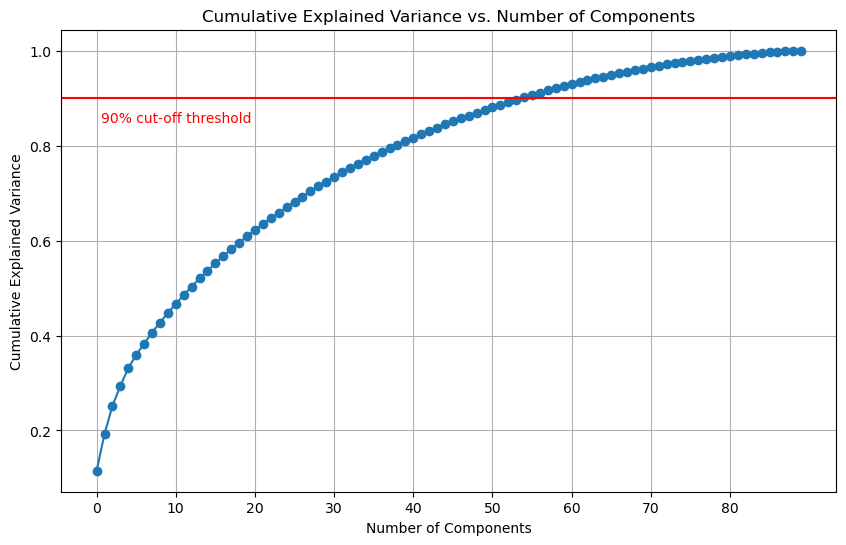

In [60]:

def find_optimal_num_components(X_train_scaled):
    pca = PCA()
    pca.fit(X_train_scaled)

    # Plot della explained variance ratio per ogni componente
    plt.figure(figsize=(10, 6))
    plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='-')
    plt.xlabel('Component Number')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs. Component Number')
    plt.grid(True)
    plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), step=10))
    plt.show()

    # Plot della cumulative explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance vs. Number of Components')
    plt.grid(True)
    plt.axhline(y=0.9, color='red', linestyle='-')
    plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=10)
    plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), step=10))
    plt.show()

# Usa questa funzione per trovare il numero ottimale di componenti principali
find_optimal_num_components(X_train_scaled)


In [61]:
# # Calcola la media dei valori assoluti dei carichi per ciascun componente principale
# mean_abs_loadings = loadings.abs().mean()

# # Ordina i carichi in ordine decrescente di importanza
# sorted_loadings = mean_abs_loadings.sort_values(ascending=False)

# print("Componenti Principali più importanti:")
# print(sorted_loadings)


In [62]:
# # Calcola gli autovalori dall'oggetto PCA
# eigenvalues = pca.explained_variance_

# # Visualizza gli autovalori
# print("Autovalori dei Componenti Principali:")
# for i, eig in enumerate(eigenvalues, 1):
#     print(f"PC{i}: {eig}")

# # Puoi anche visualizzarli in un grafico a barre per una migliore comprensione della distribuzione
# plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
# plt.xlabel('Componente Principale')
# plt.ylabel('Autovalore')
# plt.title('Autovalori dei Componenti Principali')
# plt.show()

In [63]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Considerando che principals_components è un array numpy con tre colonne
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# # Estraiamo le colonne per l'asse x, y e z
# x = principals_components_train[:, 0]
# y = principals_components_train[:, 1]
# z = principals_components_train[:, 2]

# # Plot dello scatter tridimensionale
# ax.scatter(x, y, z, c=y_train['Year'], marker='o')

# # Etichette degli assi
# ax.set_xlabel('Componente Principale 1')
# ax.set_ylabel('Componente Principale 2')
# ax.set_zlabel('Componente Principale 3')

# plt.title('Scatter Plot dei Componenti Principali')
# plt.show()


In [64]:
# # Set a threshold for which features to extract
# threshold = 0.3

# # Find features with loadings above the threshold for each principal component
# important_features = {}
# for column in loadings.columns:
#     important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

# # Now 'important_features' dictionary contains the important features for each PC
# for pc, features in important_features.items():
#     print(f"{pc}: {', '.join(features)}")

# Modeling

## imports

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import torch
import torch.nn as nn
import torch.optim as optim
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.categorical_encoders import CategoricalEmbeddingTransformer
from pytorch_tabular.models import TabNetModelConfig
from pytorch_tabular.models import TabTransformerConfig

In [66]:
def calc_metrics(y_true,y_pred,dataset_name ="",model=""):

    return {
            "mae_"+dataset_name: mean_absolute_error(y_true,y_pred),
            "mse_"+dataset_name: mean_squared_error(y_true, y_pred),
            "mape_"+dataset_name: mean_absolute_percentage_error(y_true, y_pred),
            "r2score_"+dataset_name: r2_score(y_true, y_pred)
        }

Linear-Regressor

In [ ]:
def linearReg(X_train, y_train, X_test, y_test):
    #Linear-Regressor
    reg = LinearRegression().fit(X_train, y_train)

    predizioni = reg.predict(X_test)

    mse = mean_squared_error(y_test, predizioni)
    print("Mean Squared Error (MSE):", mse)

    r_squared = r2_score(y_test, predizioni)
    print("Coefficienti di determinazione R²:", r_squared)

    mae = mean_absolute_error(y_test, predizioni)
    print("Mean Absolute Error (MAE):", mae)
    
    mape = mean_absolute_percentage_error(y_test,predizioni)
    print("Mean Absolute Percentage Error (MAPE):", mape)

In [ ]:
linearReg(X_train, y_train, X_test, y_test)
linearReg(X_train_minmax, y_train, X_test_minmax, y_test)
linearReg(X_train_scaled, y_train, X_test_scaled, y_test)
linearReg(principals_components_train, y_train, principals_components_test, y_test)

Random-Forest-Regressor

In [ ]:
X_train, X_val, y_train, y_val, X_test, y_test = my_train_validation_test()
X_train_scaled, X_test_scaled, X_val_scaled = standardization(X_val)
principals_components_train, principals_components_test, principals_components_val, pca = f_pca(55, X_val_scaled)

In [ ]:

def randomForest(X_train, y_train, X_test, y_test, n_alberi):
    rf_regressor = RandomForestRegressor(n_estimators=n_alberi, random_state=42)
    rf_regressor.fit(X_train, y_train)
    rf_predictions = rf_regressor.predict(X_test)
    mse = mean_squared_error(y_test, rf_predictions)
    r_squared = r2_score(y_test, rf_predictions)

    print("Mean Squared Error (MSE):", mse)
    print("Coefficienti di determinazione R²:", r_squared)

In [ ]:
# randomForest(principals_components_train, y_train, principals_components_test, y_test, 100)

In [ ]:
n_estimators_values = list(range(400,800,100))
metrics = []
for n_estimators in n_estimators_values:
    modello_random_forest = RandomForestRegressor(n_estimators=n_estimators,
                                                  max_depth= 140,
                                                  min_samples_split= 15,
                                                   random_state=42, n_jobs = -1)
    
    modello_random_forest.fit(principals_components_train, y_train)
    
    predizioni_val = modello_random_forest.predict(principals_components_val)
    predizioni_test = modello_random_forest.predict(principals_components_test)
    
    mse_values = mean_squared_error(y_val,predizioni_val)
    
    metrics.append(list(calc_metrics(y_val,predizioni_val,"val"),calc_metrics(y_test,predizioni_test,"test")))

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mse_values, marker='o', linestyle='-')
plt.title('MSE al variare del numero di alberi nel RandomForestRegressor')
plt.xlabel('Numero di alberi')
plt.ylabel('MSE')
plt.grid(True)
plt.show()
print(metrics)

SVM

In [86]:
def svr(num_fold, X_train, y_train, X_test, y_test):
    # Definisci la griglia dei parametri da testare
    param_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [1, 10, 50, 100]
    }

    # Inizializza il regressore SVM
    svm_regressor = SVR()

    # Definisci il numero di fold per la cross-validation
    num_folds = num_fold

    # Inizializza il KFold
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Crea un oggetto GridSearchCV per trovare i migliori parametri con la k-fold cross-validation
    grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')

    # Esegui la cross-validation per trovare i migliori parametri
    grid_search.fit(X_train, y_train)

    # Stampa i migliori parametri trovati
    print("Migliori parametri:", grid_search.best_params_)

    # Valuta il modello con la migliore combinazione di parametri
    best_svm_regressor = grid_search.best_estimator_

    # Valuta il modello sui dati di test
    y_pred = best_svm_regressor.predict(X_test)
    return calc_metrics(y_test,y_pred)

In [85]:
y_test.shape

(50435, 1)

In [83]:
principals_components_train[:-191740,:]

array([[-2.75275143e+00, -1.14191208e+00,  5.53367842e-01, ...,
        -2.36599880e-01,  4.14708622e-01, -5.94176448e-02],
       [ 6.22417134e-01,  1.44904954e+00,  5.30060079e-01, ...,
        -3.05523753e-01,  3.30977901e-01, -5.39053863e-02],
       [-5.64135257e-01, -1.47534738e+00,  3.19458559e-01, ...,
         8.17133581e-02,  1.95747935e-01, -2.90566088e-01],
       ...,
       [-7.03929476e-01, -7.07817058e-02,  2.53350341e+00, ...,
        -7.81435308e-02, -3.90627733e-01,  5.35435797e-03],
       [-1.24533865e+00,  8.92493339e+00, -3.11092245e+00, ...,
         3.22279717e+00,  2.30782781e+00,  3.18267168e-01],
       [-2.27353742e+00, -3.70310174e-01,  1.01187857e+00, ...,
        -1.58866324e-01, -1.06924476e-02, -4.37994866e-01]])

In [87]:
svr_metrics = svr(5, principals_components_train[:-191740,:],
                   y_train.head(10000),
                    principals_components_test[:-47935], y_test.head(2500))
print(svr_metrics)

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y 

Migliori parametri: {'C': 10, 'kernel': 'rbf'}
{'mae_': 6.442586074317891, 'mse_': 89.89172983960407, 'mape_': 0.00323777953306801, 'r2score_': 0.1756946961792908}


In [ ]:
plt.figure(figsize=(10, 6))
#plt.plot(neighbors, train_scores, label='Train Error', marker='o')
plt.plot(neighbors, test_scores_mae, label='Validation Error', marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('MAE')
plt.title('KNN Regression - Validation Curve')
plt.legend()
plt.grid(True)
plt.show()

KNN

In [ ]:
def knn(num_neig, X_train, y_train, X_test, y_test):
    neig = KNeighborsRegressor(n_neighbors=num_neig, n_jobs=-1)
    neig.fit(X_train, y_train)
    y_pred = neig.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error sui dati di test:", mse_test)
    r_squared = r2_score(y_test, y_pred)
    print("Coefficienti di determinazione R²:", r_squared)


In [ ]:
def knn_cv(X_train, y_train, X_val, y_val):
    # Definisci il range di iperparametri per il numero di vicini
    param_grid = {'n_neighbors': np.arange(2, 21)}

    # Inizializza il KNN Regressor
    knn = KNeighborsRegressor(n_jobs=-1)

    # Inizializza la ricerca grid
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    grid_search.fit(X_train, y_train)

    # Estrai i risultati della ricerca grid
    train_scores_mse = np.sqrt(-grid_search.cv_results_['mean_train_score'])  # Mean Squared Error sul train set
    test_scores_mse = np.sqrt(-grid_search.cv_results_['mean_test_score'])  # Mean Squared Error sul test set

    # Inizializza la ricerca grid per MAE
    grid_search_mae = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
    grid_search_mae.fit(X_train, y_train)

    train_scores_mae = -grid_search_mae.cv_results_['mean_train_score']  # Mean Absolute Error sul train set
    test_scores_mae = -grid_search_mae.cv_results_['mean_test_score']  # Mean Absolute Error sul test set

    neighbors = param_grid['n_neighbors'] # Numero di vicini

    # Plot dell'ampliamento dell'errore al variare del numero di vicini
    plt.figure(figsize=(10, 6))
    #plt.plot(neighbors, train_scores, label='Train Error', marker='o')
    plt.plot(neighbors, test_scores_mae, label='Validation Error', marker='o')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('MAE')
    plt.title('KNN Regression - Validation Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Trova il miglior modello
    best_neighbor = grid_search.best_params_['n_neighbors']
    best_model = grid_search.best_estimator_

    # Valida il miglior modello sul validation set
    y_pred_val = best_model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    mae_val = mean_absolute_error(y_val,y_pred_val)
    r_squared_val = r2_score(y_val, y_pred_val)

    print("Miglior numero di vicini:", best_neighbor)
    print("Mean Squared Error sui dati di validation:", mse_val)
    print("Coefficienti di determinazione R² sui dati di validation:", r_squared_val)

In [ ]:
knn_cv(principals_components_train, y_train, principals_components_val, y_val)

Feed-Forward

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedForward, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

def prepare_data(X_train, y_train, X_val, y_val):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)

    return train_dataset, val_dataset

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            #loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

def evaluate_model(model, val_loader):
    model.eval()
    predictions = []
    targets = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            predictions.extend(outputs.numpy())
            targets.extend(labels.numpy())
    predictions = np.array(predictions)
    targets = np.array(targets)

    return calc_metrics(targets,predictions)

In [ ]:
# Preparazione dei dati
train_dataset, val_dataset = prepare_data(principals_components_train, y_train, principals_components_val, y_val)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

# Definizione del modello
input_size = principals_components_train.shape[1]
hidden_size = 200
num_classes = 1
model = FeedForward(input_size, hidden_size, num_classes)

# Definizione della loss e dell'ottimizzatore
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Addestramento del modello
num_epochs = 10
train_model(model, train_loader, criterion, optimizer, num_epochs)

# Valutazione del modello
print(evaluate_model(model, val_loader))

In [ ]:
class FeedForwardPlus(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, depth=1):
        super(FeedForwardPlus, self).__init__()
        
        model = [
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU()
        ]

        block = [
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU()
        ]

        for i in range(depth):
            model += block
            print("i = ", i)

        
        self.model = nn.Sequential(*model)
        
        self.output = nn.Linear(hidden_size, num_classes)
        

    def forward(self, x):
        h = self.model(x)
        out = self.output(h)
        return out

In [ ]:
from itertools import product
 
depth_values = list(range(21))
hidden_size_values = [5, 10, 15, 20, 30, 50, 70, 100, 150, 200, 250, 300, 350, 400]
lr_values = [0.01, 0.1]
batch_values = [10, 20, 40, 64]
 
results = []
 
for depth, hidden_size, lr, batch_size in product(depth_values, hidden_size_values, lr_values, batch_values):
    print(f"Testing depth={depth}, hidden_size={hidden_size}, lr={lr}, batch_size={batch_size}")
 
    train_dataset, val_dataset = prepare_data(principals_components_train, y_train, principals_components_val, y_val)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        
    input_size = principals_components_train.shape[1]
    num_classes = 1
    model = FeedForwardPlus(input_size, hidden_size, num_classes, depth)
 
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
 
    num_epochs = 10
    train_model(model, train_loader, criterion, optimizer, num_epochs)
 
    mse, mae, mape, r2 = evaluate_model(model, val_loader)
   
    results.append({
        'depth': depth,
        'hidden_size': hidden_size,
        'lr': lr,
        'batch_size': batch_size,
        'mse': mse,
        'mae': mae,
        'mape': mape,
        'r2': r2
    })

Modelli deep per Tabular Data:
# TabNet

In [42]:
def test_regression_TabNet(
    regression_data,
    multi_target,
    continuous_cols,
    categorical_cols,
    continuous_feature_transform,
    normalize_continuous_features,
    target_range,
    batch_size=400,
    epochs = 7
):
    (train, test, target) = regression_data
    data_config = DataConfig(
        target=target + ["MedInc"] if multi_target else target,
        continuous_cols=continuous_cols,
        categorical_cols=categorical_cols,
        continuous_feature_transform=continuous_feature_transform,
        normalize_continuous_features=normalize_continuous_features,
        #num_workers=num_workers
    )
    model_config_params = {"task": "regression", "metrics":["mean_absolute_percentage_error","mean_absolute_error", "r2_score"]}
    if target_range:
        _target_range = []
        for target in data_config.target:
            _target_range.append(
                (
                    float(train[target].min()),
                    float(train[target].max()),
                )
            )
        model_config_params["target_range"] = _target_range
    model_config = TabNetModelConfig(**model_config_params)
    trainer_config = TrainerConfig(
        max_epochs=epochs,
        checkpoints=None,
        early_stopping=None,
        accelerator="cpu",
        fast_dev_run=False,
        batch_size= batch_size
    )
    optimizer_config = OptimizerConfig()
 
    tabular_model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
    )
    tabular_model.fit(train=train)
 
    result = tabular_model.evaluate(test)
    #assert "test_mean_squared_error" in result[0].keys()
    pred_df = tabular_model.predict(test)
    assert pred_df.shape[0] == test.shape[0]
    return result
    

In [29]:
def mergeX_Y(X,y):
    return pd.concat([X.reset_index(drop=True),
                      y.reset_index(drop=True)], axis=1)

In [31]:
def input_Tab_tests(principals_components_train,y_train,principals_components_test,y_test):
    ref_df_train = pd.DataFrame(principals_components_train)
    ref_df_test = pd.DataFrame(principals_components_test)
 
    ref_df_train.columns = ref_df_train.columns.astype(str)
    ref_df_test.columns = ref_df_test.columns.astype(str)
 
    lista = list(ref_df_train.columns)
    lista_target_range = list(range(1900, 2024))

    ref_df_train = mergeX_Y(ref_df_train,y_train)
    ref_df_test = mergeX_Y(ref_df_test,y_test)

    target_column = str(ref_df_train.columns[-1])
   
    return (ref_df_train, ref_df_test, lista, lista_target_range, target_column)

(ref_df_train, ref_df_test, lista, lista_target_range, target_column) = input_Tab_tests(principals_components_train,
                                                                                        y_train,
                                                                                        principals_components_test,
                                                                                        y_test)

In [48]:
metrics = test_regression_TabNet(regression_data=(ref_df_train, ref_df_test, [target_column]), multi_target=False,
    continuous_cols=lista,
    categorical_cols=[],
    continuous_feature_transform=None,
    normalize_continuous_features=True,
    target_range=False,
    epochs=7,
    batch_size=200
)


2024-07-01 19:14:29,569 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-01 19:14:29,581 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-01 19:14:29,590 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-01 19:14:30,402 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-07-01 19:14:30,418 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-01 19:14:30,432 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.2 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.2 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.2 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=7` reached.


2024-07-01 19:22:36,985 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-01 19:22:36,987 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:54: Detected 
KeyboardInterrupt, attempting graceful shutdown...

# TabTrasformer

In [88]:
def test_regression(
    regression_data,
    multi_target,
    continuous_cols,
    categorical_cols,
    continuous_feature_transform,
    normalize_continuous_features,
    target_range,
    epoch = 10,
    batch_size = 500
):
    (train, test, target) = regression_data
    data_config = DataConfig(
        target=target + ["MedInc"] if multi_target else target,
        continuous_cols=continuous_cols,
        categorical_cols=categorical_cols,
        continuous_feature_transform=continuous_feature_transform,
        normalize_continuous_features=normalize_continuous_features
    )
    model_config_params = {
        "task": "regression",
        "input_embed_dim": 8,
        "num_attn_blocks": 1,
        "num_heads": 2,
        "metrics":["mean_absolute_percentage_error","mean_absolute_error","r2_score"]
    }
    if target_range:
        _target_range = []
        for target in data_config.target:
            _target_range.append(
                (
                    float(train[target].min()),
                    float(train[target].max()),
                )
            )
        model_config_params["target_range"] = _target_range
    model_config = TabTransformerConfig(**model_config_params)
    trainer_config = TrainerConfig(
        max_epochs= epoch,
        checkpoints=None,
        early_stopping=None,
        accelerator="cpu",
        fast_dev_run=False,
        batch_size= batch_size
    )
    optimizer_config = OptimizerConfig()

    tabular_model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
    )
    #print(train[53])
    tabular_model.fit(train=train)

    result = tabular_model.evaluate(test)
    #assert "test_mean_squared_error" in result[0].keys()
    pred_df = tabular_model.predict(test)
    assert pred_df.shape[0] == test.shape[0]
    return result

In [ ]:
def input_Tab_tests(principals_components_train,y_train,principals_components_test,y_test):
    ref_df_train = pd.DataFrame(principals_components_train)
    ref_df_test = pd.DataFrame(principals_components_test)
 
    ref_df_train.columns = ref_df_train.columns.astype(str)
    ref_df_test.columns = ref_df_test.columns.astype(str)
 
    lista = list(ref_df_train.columns)
    lista_target_range = list(range(1900, 2024))

    ref_df_train = mergeX_Y(ref_df_train,y_train)
    ref_df_test = mergeX_Y(ref_df_test,y_test)

    target_column = str(ref_df_train.columns[-1])
   
    return (ref_df_train, ref_df_test, lista, lista_target_range, target_column)

In [ ]:
res = test_regression(regression_data=(ref_df_train, ref_df_test, [target_column]), multi_target = None,
    continuous_cols = lista,
    categorical_cols = [],
    continuous_feature_transform = None,
    normalize_continuous_features = False,
    target_range=True, batch_size= 100, epoch=7)

In [ ]:
ref_df_train

## Valutazione tabtransformer

In [90]:
def hyperparameter(batch_size, epochs):
    result = test_regression(regression_data=(ref_df_train, ref_df_test, [target_column]), multi_target = None,
        continuous_cols = lista,
        categorical_cols = [],
        continuous_feature_transform = None,
        normalize_continuous_features = False,
        target_range=True,
        batch_size=batch_size,
        epoch=epochs )
    return result

### single core

In [91]:
epochs = list(range(5,10,1))
batch_size = list(range(100,500,100))
results = []
for j,batch in enumerate(batch_size):
    for i,epoch in enumerate(epochs):
        result = hyperparameter(batch_size=batch,epochs=epoch)
        result[0]["batch_size"] = batch
        result[0]["epochs"] = epoch
        results.append(result)
        print(result)

2024-07-02 16:32:49,304 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 16:32:49,323 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 16:32:49,334 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 16:32:49,393 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 16:32:49,407 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 16:32:49,462 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=5` reached.


2024-07-02 16:35:00,245 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 16:35:00,246 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │            94.369140625             │
│      test_mean_absolute_error       │          7.222815990447998          │
│ test_mean_absolute_percentage_error │        0.003625319804996252         │
│            test_r2_score            │         0.12079910933971405         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.369140625, 'test_mean_absolute_percentage_error': 0.003625319804996252, 'test_mean_absolute_error': 7.222815990447998, 'test_r2_score': 0.12079910933971405, 'batch_size': 100, 'epochs': 5}]


2024-07-02 16:35:05,363 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 16:35:05,384 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 16:35:05,395 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 16:35:05,457 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 16:35:05,476 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 16:35:05,512 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=6` reached.


2024-07-02 16:37:31,535 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 16:37:31,536 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.34442138671875          │
│      test_mean_absolute_error       │          7.211147785186768          │
│ test_mean_absolute_percentage_error │        0.003619508119300008         │
│            test_r2_score            │         0.12103891372680664         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.34442138671875, 'test_mean_absolute_percentage_error': 0.003619508119300008, 'test_mean_absolute_error': 7.211147785186768, 'test_r2_score': 0.12103891372680664, 'batch_size': 100, 'epochs': 6}]


2024-07-02 16:37:36,771 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 16:37:36,785 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 16:37:36,793 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 16:37:36,850 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 16:37:36,862 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 16:37:36,893 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=7` reached.


2024-07-02 16:40:33,984 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 16:40:33,985 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.69144439697266          │
│      test_mean_absolute_error       │          7.345756530761719          │
│ test_mean_absolute_percentage_error │        0.0036860217805951834        │
│            test_r2_score            │         0.11701684445142746         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.69144439697266, 'test_mean_absolute_percentage_error': 0.0036860217805951834, 'test_mean_absolute_error': 7.345756530761719, 'test_r2_score': 0.11701684445142746, 'batch_size': 100, 'epochs': 7}]


2024-07-02 16:40:39,345 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 16:40:39,357 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 16:40:39,367 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 16:40:39,419 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 16:40:39,432 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 16:40:39,446 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=8` reached.


2024-07-02 16:44:04,985 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 16:44:04,986 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.61128997802734          │
│      test_mean_absolute_error       │          7.322083950042725          │
│ test_mean_absolute_percentage_error │        0.003674190491437912         │
│            test_r2_score            │         0.1168038472533226          │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.61128997802734, 'test_mean_absolute_percentage_error': 0.003674190491437912, 'test_mean_absolute_error': 7.322083950042725, 'test_r2_score': 0.1168038472533226, 'batch_size': 100, 'epochs': 8}]


2024-07-02 16:44:10,225 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 16:44:10,240 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 16:44:10,248 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 16:44:10,306 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 16:44:10,318 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 16:44:10,349 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=9` reached.


2024-07-02 16:47:58,565 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 16:47:58,566 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.51490783691406          │
│      test_mean_absolute_error       │          7.285276412963867          │
│ test_mean_absolute_percentage_error │        0.0036559822037816048        │
│            test_r2_score            │         0.11839146167039871         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.51490783691406, 'test_mean_absolute_percentage_error': 0.0036559822037816048, 'test_mean_absolute_error': 7.285276412963867, 'test_r2_score': 0.11839146167039871, 'batch_size': 100, 'epochs': 9}]


2024-07-02 16:48:04,095 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 16:48:04,109 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 16:48:04,117 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 16:48:04,174 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 16:48:04,187 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 16:48:04,199 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=5` reached.


2024-07-02 16:49:14,588 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 16:49:14,590 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.33193969726562          │
│      test_mean_absolute_error       │          7.259413242340088          │
│ test_mean_absolute_percentage_error │        0.0036432561464607716        │
│            test_r2_score            │         0.1280350685119629          │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.33193969726562, 'test_mean_absolute_percentage_error': 0.0036432561464607716, 'test_mean_absolute_error': 7.259413242340088, 'test_r2_score': 0.1280350685119629, 'batch_size': 200, 'epochs': 5}]


2024-07-02 16:49:17,912 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 16:49:17,925 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 16:49:17,934 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 16:49:17,989 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 16:49:18,003 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 16:49:18,016 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=6` reached.


2024-07-02 16:50:42,972 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 16:50:42,973 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.38996887207031          │
│      test_mean_absolute_error       │          7.284385681152344          │
│ test_mean_absolute_percentage_error │        0.003655505133792758         │
│            test_r2_score            │         0.12725864350795746         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.38996887207031, 'test_mean_absolute_percentage_error': 0.003655505133792758, 'test_mean_absolute_error': 7.284385681152344, 'test_r2_score': 0.12725864350795746, 'batch_size': 200, 'epochs': 6}]


2024-07-02 16:50:46,224 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 16:50:46,237 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 16:50:46,247 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 16:50:46,301 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 16:50:46,314 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 16:50:46,325 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=7` reached.


2024-07-02 16:52:22,790 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 16:52:22,791 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.48416900634766          │
│      test_mean_absolute_error       │          7.306077003479004          │
│ test_mean_absolute_percentage_error │        0.0036663394421339035        │
│            test_r2_score            │         0.12671256065368652         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.48416900634766, 'test_mean_absolute_percentage_error': 0.0036663394421339035, 'test_mean_absolute_error': 7.306077003479004, 'test_r2_score': 0.12671256065368652, 'batch_size': 200, 'epochs': 7}]


2024-07-02 16:52:25,859 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 16:52:25,874 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 16:52:25,925 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 16:52:25,990 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 16:52:26,005 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 16:52:26,019 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=8` reached.


2024-07-02 16:54:47,861 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 16:54:47,862 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.41085815429688          │
│      test_mean_absolute_error       │          7.278330326080322          │
│ test_mean_absolute_percentage_error │         0.00365255493670702         │
│            test_r2_score            │         0.12708212435245514         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.41085815429688, 'test_mean_absolute_percentage_error': 0.00365255493670702, 'test_mean_absolute_error': 7.278330326080322, 'test_r2_score': 0.12708212435245514, 'batch_size': 200, 'epochs': 8}]


2024-07-02 16:54:51,595 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 16:54:51,610 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 16:54:51,620 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 16:54:51,681 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 16:54:51,739 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 16:54:51,754 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=9` reached.


2024-07-02 16:56:56,133 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 16:56:56,134 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.38006591796875          │
│      test_mean_absolute_error       │          7.240161895751953          │
│ test_mean_absolute_percentage_error │        0.0036337177734822035        │
│            test_r2_score            │         0.12770429253578186         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.38006591796875, 'test_mean_absolute_percentage_error': 0.0036337177734822035, 'test_mean_absolute_error': 7.240161895751953, 'test_r2_score': 0.12770429253578186, 'batch_size': 200, 'epochs': 9}]


2024-07-02 16:56:59,217 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 16:56:59,231 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 16:56:59,240 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 16:56:59,337 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 16:56:59,351 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 16:56:59,369 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=5` reached.


2024-07-02 16:57:50,008 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 16:57:50,009 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.33970642089844          │
│      test_mean_absolute_error       │          7.259396553039551          │
│ test_mean_absolute_percentage_error │        0.003643212141469121         │
│            test_r2_score            │         0.12904879450798035         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.33970642089844, 'test_mean_absolute_percentage_error': 0.003643212141469121, 'test_mean_absolute_error': 7.259396553039551, 'test_r2_score': 0.12904879450798035, 'batch_size': 300, 'epochs': 5}]


2024-07-02 16:57:52,567 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 16:57:52,581 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 16:57:52,591 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 16:57:52,647 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 16:57:52,662 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 16:57:52,675 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=6` reached.


2024-07-02 16:58:53,512 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 16:58:53,512 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.43154907226562          │
│      test_mean_absolute_error       │         7.2947163581848145          │
│ test_mean_absolute_percentage_error │        0.0036605752538889647        │
│            test_r2_score            │         0.12805451452732086         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.43154907226562, 'test_mean_absolute_percentage_error': 0.0036605752538889647, 'test_mean_absolute_error': 7.2947163581848145, 'test_r2_score': 0.12805451452732086, 'batch_size': 300, 'epochs': 6}]


2024-07-02 16:58:55,931 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 16:58:55,969 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 16:58:55,999 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 16:58:56,064 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 16:58:56,078 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 16:58:56,092 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=7` reached.


2024-07-02 17:01:08,911 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 17:01:08,912 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.35527801513672          │
│      test_mean_absolute_error       │          7.250271797180176          │
│ test_mean_absolute_percentage_error │        0.0036387890577316284        │
│            test_r2_score            │         0.12923435866832733         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.35527801513672, 'test_mean_absolute_percentage_error': 0.0036387890577316284, 'test_mean_absolute_error': 7.250271797180176, 'test_r2_score': 0.12923435866832733, 'batch_size': 300, 'epochs': 7}]


2024-07-02 17:01:15,659 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 17:01:15,674 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 17:01:15,684 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 17:01:15,743 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 17:01:15,798 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 17:01:15,811 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=8` reached.


2024-07-02 17:04:26,438 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 17:04:26,440 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.34818267822266          │
│      test_mean_absolute_error       │          7.258200645446777          │
│ test_mean_absolute_percentage_error │        0.0036426137667149305        │
│            test_r2_score            │         0.12904445827007294         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.34818267822266, 'test_mean_absolute_percentage_error': 0.0036426137667149305, 'test_mean_absolute_error': 7.258200645446777, 'test_r2_score': 0.12904445827007294, 'batch_size': 300, 'epochs': 8}]


2024-07-02 17:04:28,663 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 17:04:28,680 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 17:04:28,689 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 17:04:28,788 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 17:04:28,802 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 17:04:28,873 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=9` reached.


2024-07-02 17:06:02,019 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 17:06:02,022 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.34253692626953          │
│      test_mean_absolute_error       │          7.23739767074585           │
│ test_mean_absolute_percentage_error │        0.0036323312669992447        │
│            test_r2_score            │         0.1291934847831726          │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.34253692626953, 'test_mean_absolute_percentage_error': 0.0036323312669992447, 'test_mean_absolute_error': 7.23739767074585, 'test_r2_score': 0.1291934847831726, 'batch_size': 300, 'epochs': 9}]


2024-07-02 17:06:04,634 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 17:06:04,647 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 17:06:04,656 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 17:06:04,711 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 17:06:04,724 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 17:06:04,736 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=5` reached.


2024-07-02 17:06:43,719 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 17:06:43,721 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.35494995117188          │
│      test_mean_absolute_error       │          7.24185037612915           │
│ test_mean_absolute_percentage_error │        0.0036345624830573797        │
│            test_r2_score            │         0.13051791489124298         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.35494995117188, 'test_mean_absolute_percentage_error': 0.0036345624830573797, 'test_mean_absolute_error': 7.24185037612915, 'test_r2_score': 0.13051791489124298, 'batch_size': 400, 'epochs': 5}]


2024-07-02 17:06:45,649 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-07-02 17:06:45,662 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-02 17:06:45,672 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-02 17:06:45,730 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-02 17:06:45,743 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-07-02 17:06:45,756 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

In [ ]:
#results = results[0]

In [ ]:
type(results[0][0])

In [ ]:
list_dict = [item[0] for item in results]

In [ ]:
df_res =pd.DataFrame(list_dict)
df_res.to_csv("./df_Res.csv")

In [ ]:
df_res.sort_values(["epochs","batch_size"])

In [ ]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(df_res['epochs'], df_res['test_mean_absolute_percentage_error'], c=df_res['batch_size'], cmap='Blues', s=100, label='loss', alpha=0.6, edgecolors='w')
#plt.scatter(df_res['epochs'], df_res['test_mean_absolute_error'], c=df_res['batch_size'], cmap='Blues', s=200, label='MAE', alpha=0.6, edgecolors='w')
#plt.scatter(df_res['epochs'], df_res['test_mean_absolute_percentage_error'], marker='o', label='MAPE')
#plt.scatter(df_res['epochs'], df_res['test_r2_score'], marker='o', label='R2')

cbar = plt.colorbar(scatter)
cbar.set_label('batch_Size')
plt.xlabel('epochs')
plt.ylabel('Errore')
plt.title('Variazione degli errori al variare delle epoche')
plt.legend()
 
plt.grid(True)
plt.show()